<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-продаж-по-времени" data-toc-modified-id="Анализ-продаж-по-времени-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ продаж по времени</a></span></li><li><span><a href="#Анализ-срока-существования-игровой-платформы" data-toc-modified-id="Анализ-срока-существования-игровой-платформы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ срока существования игровой платформы</a></span></li><li><span><a href="#Актуальный-анализ-игровых-платформ" data-toc-modified-id="Актуальный-анализ-игровых-платформ-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Актуальный анализ игровых платформ</a></span></li></ul></li><li><span><a href="#Пользовательский-портрет-в-регионах" data-toc-modified-id="Пользовательский-портрет-в-регионах-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Пользовательский портрет в регионах</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Прогнозирование популярности компьютерных игр

В нашем распоряжении исторические данные из открытых источников о продаже игр, оценки пользователей и экспертов, жанры и платформы. 

Задача: выявить определяющие успешность игры закономерности для планирования рекламной кампании интернет-магазина "Стримчик". Нужно отработать принцип работы с данными, который позволит прогнозировать потенциально популярной продукт. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла 

In [1]:
import pandas as pd 
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

server_path = '/datasets/games.csv'
filename = 'games.csv'

try: 
    data = pd.read_csv(server_path, sep=',')
except: 
    data = pd.read_csv(filename, sep=',')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных 

Для начала необходимо привести данные к нужным типам и привести названия столбцов к единому регистру. 

In [4]:
data.columns = [x.lower() for x in data.columns]

Заменим тип данных столбца с годом выпуска на целочисленный, а пользовательский рейтинг переведем в тип *float* для расчетов, но перед этим необходимо избавиться от пропусков. 

In [5]:
data.duplicated().sum()

0

In [6]:
data.loc[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы не можем автоматически заполнить год выпуска, а перебирать 269 строк вручную не кажется адекватным в случае, если пропуски составляют лишь 1,6% от всего датасета. Это полностью случайные пропуски, зависящие только от значений столбца с именем. 

In [7]:
data.dropna(subset = ['year_of_release'], inplace=True)

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [10]:
data.loc[data['name'].isnull() & data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названиях игр и жанрах совпадают. В этих же строках отсутствуют оценки и рейтинг, год выпуска этих игр также нерелевантен нашему исследованию. От них мы тоже избавимся. 

In [11]:
data.dropna(subset = ['name'], inplace=True)

Теперь нас интересуют оценки критиков и пользователей, а также рейтинг игр. Пропусков в этих данных много. 

In [12]:
nan_score = data.loc[data['critic_score'].isnull()]
nan_score.query('year_of_release >= 2015')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [13]:
data.query('year_of_release >= 2015')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5,E
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [14]:
data['user_score'].value_counts().head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

Почти половина игр, выпущенных после 2015 года не имеет оценок критиков и пользователей. Вероятно, это так, потому что, согласно описанию, эти игры были выпушены недавно и, скорей всего, еще находятся на этапе оценивания. Заменим пропуски на общепринятую аббревиатуру, уже используемую в датасете, - *tbd (to be discussed)*, что означает *подлежит рассмотрению*. Так мы не потеряем большую часть данных, необходимых для качественной оценки продаж, и сохраним их для анализа оценок критиков и пользователей в дальнейшем. 

In [15]:
data['critic_score'] = data['critic_score'].fillna('tbd')
data['user_score'] = data['user_score'].fillna('tbd')

In [16]:
data['critic_score'].value_counts().head()

tbd     8461
70.0     252
71.0     248
75.0     240
80.0     235
Name: critic_score, dtype: int64

In [17]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Пропуски данных о рейтинге также заменим на аббревиатуру *NR* или *not rated*. Наличие пропусков в этих данных можно объяснить разными причинами. Например, конкретные разработчики не сотрудничают с американской компанией ESRB и имеют собственную региональную (европейскую, российскую, китайскую) систему маркировки, что не отражено в датасете. Эти пропуски можно отнести к категории неслучайных, то есть зависимых от значений в других столбцах. 

In [18]:
data['rating'] = data['rating'].fillna('NR')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int32(1), object(6)
memory usage: 1.4+ MB


От пропусков мы избавились, удалив или заменив их на удобные для использования категории. 

Добавим столбец с суммарными продажами во всех регионах. 

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd,tbd,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd,tbd,NR,31.38


## Исследовательский анализ данных

### Анализ продаж по времени

Посмотрим, сколько игр выпускалось в разные годы. 

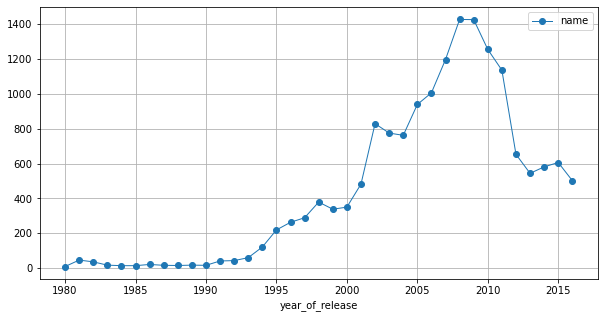

In [22]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    style='o-', figsize=(10, 5), linewidth=1, grid=True)
plt.show()

В таблице представлены игры, выпущенные с 1980-го года. Всплеск игровой индустрии наблюдался в начале 2000-х, рост количества ежегодно выпускаемых игр продолжался вплоть до 2008 года. Затем оно стало резко снижаться. 

Здесь есть две теории, почему это могло произойти. В действительности, вероятно, оба фактора оказали влияние на игровой рынок. Первая - глобальный экономический кризис 2008-го года сказался на всех индустриях, включая игровую.
Вторая - уменьшение количества выпускаемых игр связано с повышением их качества. Временных, финансовых ресурсов и мощностей на разработку необходимо все больше, поскольку изменился пользовательский запрос, а также появились игровые гиганты, технологическое развитие которых способствовало увеличению качества продукции. 

Проверим вторую теорию, проанализировав появление новых платформ и их продажи. 

In [23]:
biggest_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
biggest_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выделим топ-10 платформ с наибольшими продажами и построим график распределения продаж по годам. 

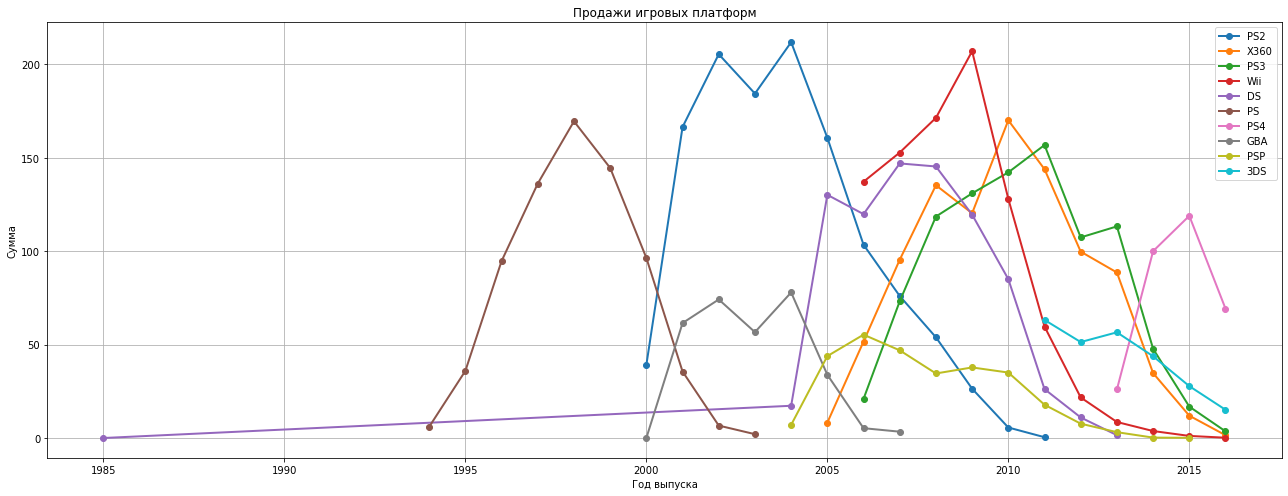

In [24]:
top10_sales = biggest_sales.head(10)
top10_sales_by_year = data.query('platform in @top10_sales.index').groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform = top10_sales.index
for i in platform: 
    top10_sales_by_year[i].plot(style='o-', kind='line', figsize=(18, 7), label=i, linewidth=2, grid=True)
    plt.title('Продажи игровых платформ')
    plt.legend()
    plt.xlabel('Год выпуска')
    plt.ylabel('Сумма')

plt.tight_layout()

Судя по графику, продажи игр всех платформ к 2016 году упали. Почти у каждой из них налюдается своеобразный жизненный цикл: рост популярности, пик, спад. Пример компании Play Station показывает, что цикл зависит от релиза игровой платформы нового поколения. Так, PS, существовавшая с 1994 до 2003 закончила выпускать игры в момент пиковой популярности PS следующего поколения - PS2, которая так же прошла этот цикл и прекратила продажи игр в 2011 году, когда PS3 имела максимум прибыли. 

Следуя этой логике, нам необходимо проверить, нет ли в платформах, продажи которых не позволили им войти в топ-10, платформ нового поколения. Выведем график распределения продаж во времени еще плюс 10 игровых платформ. 

Ко всему прочему в строках платформы DS есть фактическая ошибка. Консоль была выпущена в 2004 году, а в датасете год выпуска первой игры указан 1985.  

In [25]:
DS = data.query('platform == "DS"')
DS.loc[DS['year_of_release'] == 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,tbd,tbd,NR,0.02


Удалим эту строку.

In [26]:
data.drop(data[data['name'] == 'Strongest Tokyo University Shogi DS'].index, inplace=True)

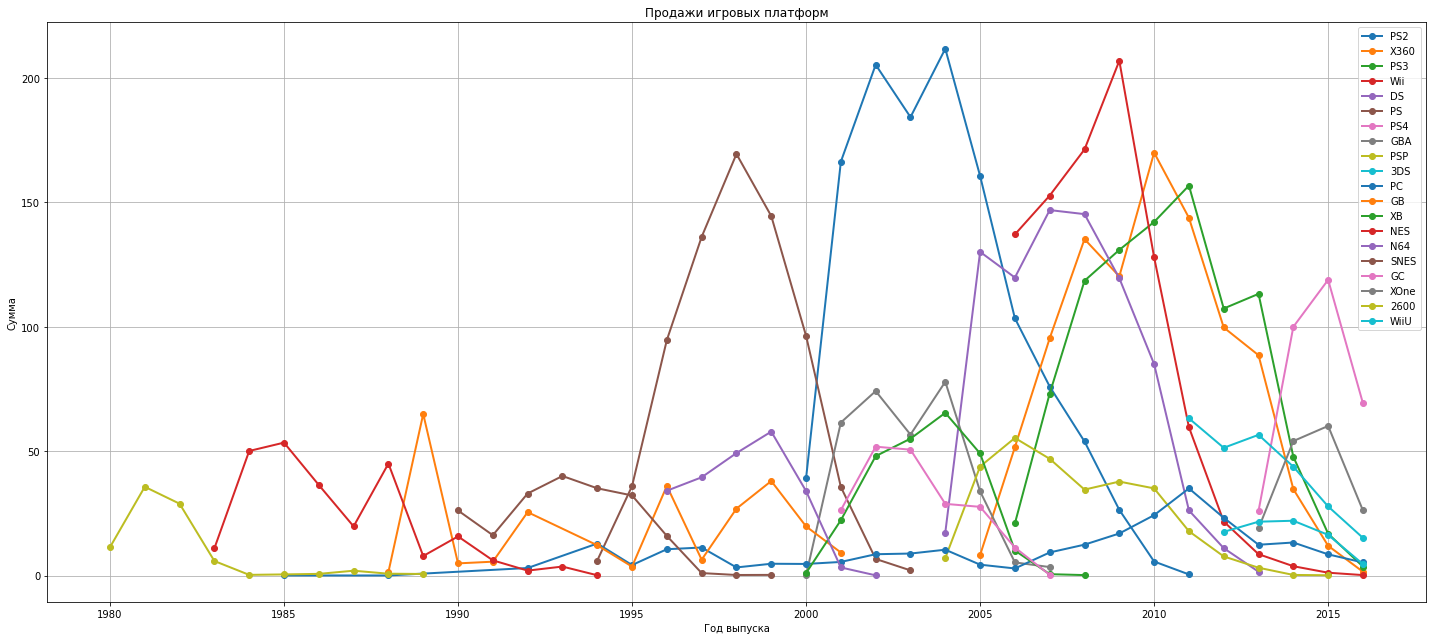

In [27]:
top10_sales = biggest_sales.head(20)
top10_sales_by_year = data.query('platform in @top10_sales.index').groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform = top10_sales.index
for i in platform: 
    top10_sales_by_year[i].plot(style='o-', kind='line', figsize=(20, 9), label=i, linewidth=2, grid=True)
    plt.title('Продажи игровых платформ')
    plt.legend()
    plt.xlabel('Год выпуска')
    plt.ylabel('Сумма')

plt.tight_layout()

К актуальным на текущий момент добавилась платформа XOne, конкурирующая с PS4 и появившаяся в том же 2013 году, и, вероятно, только набирающая популярность. Помимо XOne в конце графика появилась консоль WiiU от Nintendo, но продажи ее к 2016 году упали в связи с будущим релизом Nintendo Switch. 

### Анализ срока существования игровой платформы 

Посмотрим, сколько длится характерный цикл игровых платформ для оценки вероятных продаж в будущем. 

In [28]:
life_cycle = data.pivot_table(index='platform', values=('year_of_release'), aggfunc=('max', 'min'))
life_cycle['life'] = life_cycle['max'] - life_cycle['min']

In [29]:
life_cycle.columns = ['max_year', 'min_year', 'life']
life_cycle.query('platform != "PC"')

,max_year,min_year,life
platform,,,
2600,1989,1980,9
3DO,1995,1994,1
3DS,2016,2011,5
DC,2008,1998,10
DS,2013,2004,9
GB,2001,1988,13
GBA,2007,2000,7
GC,2007,2001,6
GEN,1994,1990,4


In [30]:
life_cycle['life'].median()

6.0

Средний срок жизни 6 лет. Для более ранних платформ характерен более короткий срок выпуска продукта. Кто-то устаревал, кто-то оптимизировал продукт под новый запрос. Посмотрим на платформы, которые появились уже после 2000 года.  

In [31]:
life_cycle_cut = life_cycle.query('platform != "PC" and min_year >= 2000')
life_cycle_cut

,max_year,min_year,life
platform,,,
3DS,2016,2011,5
DS,2013,2004,9
GBA,2007,2000,7
GC,2007,2001,6
PS2,2011,2000,11
PS3,2016,2006,10
PS4,2016,2013,3
PSP,2015,2004,11
PSV,2016,2011,5


In [32]:
life_cycle_cut['life'].median()

7.5

In [33]:
life_cycle_cut2 = life_cycle.query('platform != "PC" and min_year >= 2000 and life > 5')
life_cycle_cut2['life'].median()

10.0

У платформ, выпущенных после 2000 года более долгий период существования - в среднем 7,5 лет, учитывая те, что на момент составления датасета еще выпускали игры. Если их удалить, средняя "жизнь" увеличится до 10 лет. Компания Play Station меняет платформу раз в 10 лет. Игровые консоли Xbox тоже живут довольно долго. Первая существовала 8 лет. Вторая - 11.   

Таким образом, точкой отсчета *актуального периода* будем считать 2013 год, когда на рынок вышли игровые приставки восьмого поколения - PS4 и XOne, только начинающие свой цикл. График распределения продаж по времени также подтверждает логичность этой даты. В 2013 году налюдалось небольшое увеличение количества выпущенных игр по сравнению с его резким падением за предыдущие два года. 

### Актуальный анализ игровых платформ 

**Исследование динамики продаж**

In [34]:
platforms = data.query('year_of_release >= 2013')
platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,tbd,tbd,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,tbd,tbd,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [35]:
platforms_table = platforms.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
platforms_table

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Несмотря на продажи игр после 2013 года, поддержка некоторых из этих консолей за актуальный период была прекращена. Еще раз выведем график, чтобы отсечь те платформы, что к 2016 году перестали производить игры. 

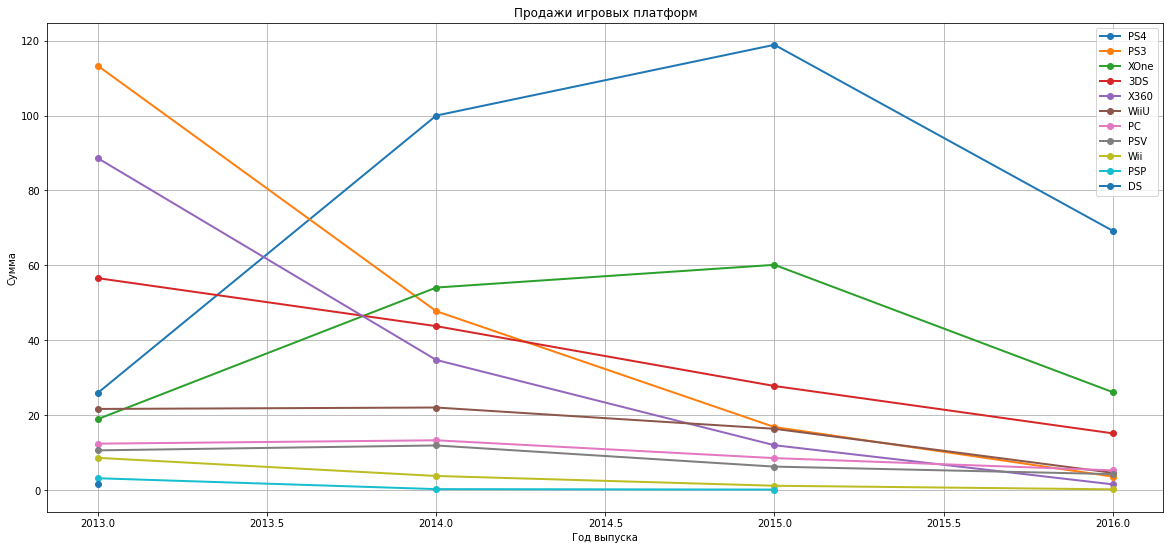

In [36]:
platforms_grouped = platforms.groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform = platforms_table.index
for i in platform:
    platforms_grouped[i].plot(style='o-', kind='line', figsize=(20, 9), label=i, linewidth=2, grid=True)
    plt.title('Продажи игровых платформ')
    plt.legend()
    plt.xlabel('Год выпуска')
    plt.ylabel('Сумма')

plt.show()

DS выпустила свою последнюю игру в 2013 году. PSP также прекратила выпуск в 2015. К 2016 году почти в ноль ушли PS3, на смену которой пришла PS4, X360, которую сменила XOne и Wii, новой версией которой стала Wii U. Таким образом, мы можем выделить ряд действительных на 2016 год игровых приставок: PS4 от PlayStation, XOne от XBox, WiiU от Nintendo. Также портативные консоли 3DS от Nintendo и PSV от Play Station. Кроме того, продолжается выпуск игр для компьютеров(PC). 

Лидерами продаж являются PS4, XOne и 3DS. Актуальный датасет выглядит следующим образом. 

In [37]:
platforms_actual = ['PS4', 'XOne', '3DS', 'WiiU', 'PSV', 'PC']
games = platforms.query('platform in @platforms_actual')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,tbd,tbd,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,tbd,tbd,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,tbd,tbd,NR,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Посмотрим, насколько большой разброс между продажами разных платформ. 

In [38]:
games['total_sales'].describe()

count    1604.000000
mean        0.469925
std         1.150981
min         0.010000
25%         0.030000
50%         0.100000
75%         0.360000
max        14.630000
Name: total_sales, dtype: float64

В среднем продажи игр исчисляются сотнями тысяч копий. Медиана - 100 тысяч копий, в то время как среднее значение в 4,6 раза больше - 460 тысяч проданных копий. Это говорит о том, что отдельные игры значительно лидируют по популярности среди пользователей и мы можем наблюдать некоторое количество очень крупных выбросов - макисмальное значение в актуальном датасете 14, 6 млн. проданных копий с 2013 года. 

Построим диаграмму размаха без выбросов для наглядности. 

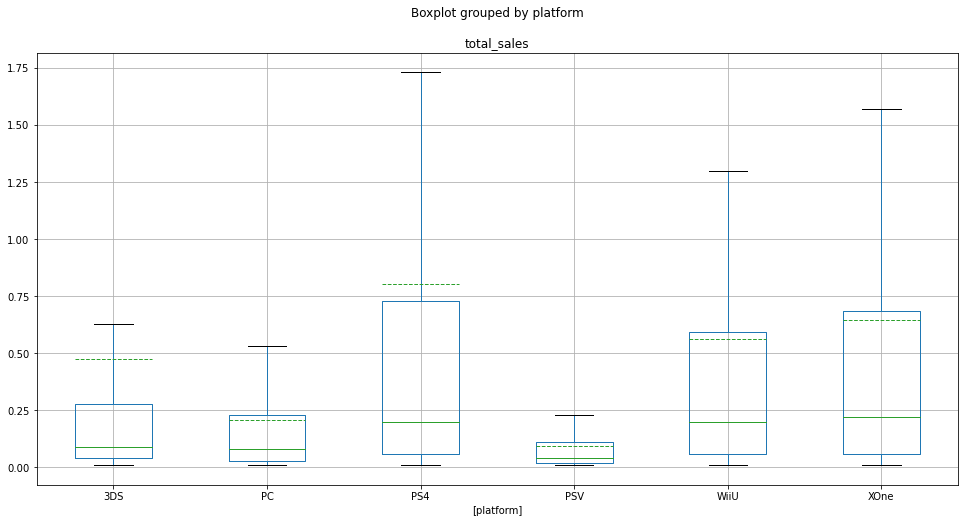

In [39]:
a = games[['total_sales', 'platform']]
ax = a.boxplot(by='platform', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=False, return_type='axes', figsize=(16, 8))

Согласно графику, медианное значение продаж игр платформ PS4, WiiU и XOne - 0,2, 0,2 и 0,23 млн. копий соответственно. Несмотря на то, что медиана продаж PS4 чуть меньше, чем XOne, ее среднее значительно больше - 0,8 млн. копий (у XOne в районе 0,68 млн.) и граница усов выше - 1,73 млн. То есть сама коробка находится на одном и том же уровне, но усы платформы от Play Station длиннее и среднее находится за пределами третьего квартиля. Это говорит о том, что у PS4 есть ряд игр, ставших бестселлерами игровой индустрии за текущий период. У XOne они тоже есть, но не в таком количестве. 

Интересно также, что среднее значение продаж игр на платформе 3DS (0,48) приближено к границе верхнего уса (0,67), тогда как медиана в районе 0,16. Разница между ними составляет почти 0,3 млн. копий. Примерно такая же разница между медианой (0,2) и средним (0,55) у продаж платформы WiiU, однако крайняя точка усов высоко (почти 1,3 млн. копий). Можно предположить, что у портативной консоли 3DS больше единичных игр, уже завоевавших признание пользователей в прошлом, но превалирующее большинство выпущенных игр совсем не популярно, в то время как WiiU стандартно выпускает игры с преимущественно одинаковым успехом у пользователей. Срок существования этих платформ примерно одинаковый (5 лет 3DS, 4 года WiiU), но суммарные продажи первой за все время почти в 3 раза больше, чем второй; за актуальный период в 2,2 раза. Кроме того, в 2017 году компания Nintendo прекратит поддержку платформы WiiU. График выше подтвержает это: пик продаж игр платформы 3DS произошел в момент ее запуска в 2012 году, а затем ее популярность стала падать. WiiU весь период существования выпускала игры, копии которых продавались с успехом в районе 100 тысяч. 

Рост популярности домашних и портативных консолей повлиял на пользовательский интерес к играм на ПК. За актуальный период медианные продажи составили примерно 0,15 млн. копий. Среднее в районе 0,2. Тем не менее граница третьего квартиля обозначена цифрой в 0,52 млн. копий, что также говорит о наличии выбросов, то есть более успешных единичных релизов. 
 
Наименьшей популярностью пользуется PSV. Видимо, качество контента платформы или самой консоли оказалось заметно ниже ее конкурента от Nintendo и, по сравнению с 3DS на ней нет настолько выдающихся бестселлеров.

Проверим наши выводы, построив диаграмму размаха с выбросами.

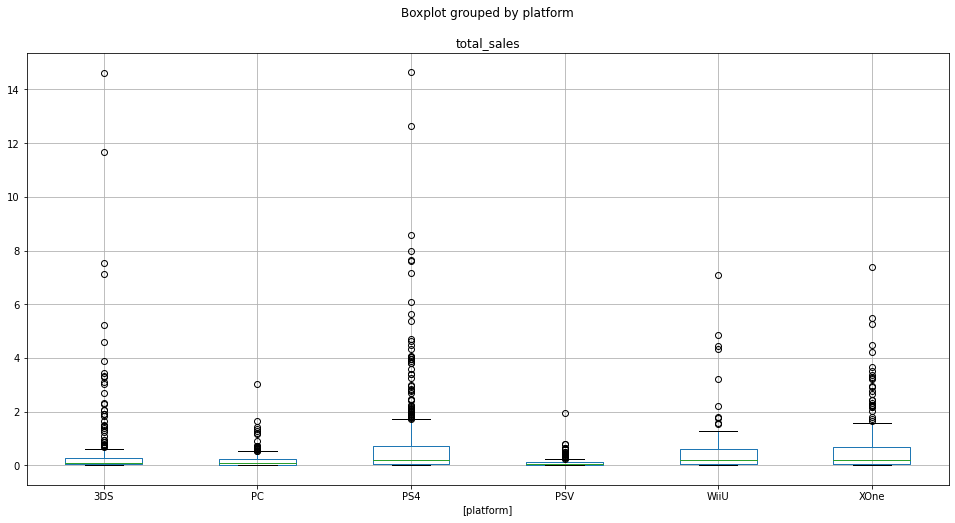

In [40]:
a = games[['total_sales', 'platform']]
ax = a.boxplot(by='platform', meanline=True, showcaps=True, 
                showbox=True, showfliers=True, return_type='axes', figsize=(16, 8))

Да, действительно. Сравнивая конкурентов PS4 и XOne, можно отметить, что на первой платформе выходили игры, завоевашие наибольшую популярность у пользователей. Выбросов много и числовые значения их доходят вплоть до 14,5 млн. копий, тогда как пиковое значение XOne - 7,5 млн. 

Такая же история с 3DS и PSV. У первой есть игры - бесспорные лидеры игровой индустрии - 11,7 и 14,5 млн. копий - и в целом количество выбросов намного больше нежели у PSV. Ее максимум за актуальный период - 2 млн. копий. 

Тезис о ровных продажах игр на платформе WiiU также подтверждается графиком с выбросами. Особо популярные игры были, но относительно других платформ их немного. Зато медиана на высоком уровне, сравнимом с конкурентами ее следующей версии - Nintendo Switch. 

Наличие небольшого количества выбросов на ПК также подтверждает сделанные ранее выводы.

**Влияние оценок критиков и пользователей на продажи**

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве платформы выберем лидера продаж за 2016 год - PS4. 

In [41]:
ps = games.query('platform == "PS4"')
ps.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,tbd,tbd,NR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,tbd,tbd,NR,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


В данных об оценках у нас есть строки со значением tbd. Для построения графика нам необходимо их отсечь и перевести тип данных в числовой. 

In [42]:
user_ps = ps.query('user_score != "tbd"')

In [43]:
user_ps['user_score'] = pd.to_numeric(user_ps['user_score'])
user_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             257 non-null    object 
 1   platform         257 non-null    object 
 2   year_of_release  257 non-null    int32  
 3   genre            257 non-null    object 
 4   na_sales         257 non-null    float64
 5   eu_sales         257 non-null    float64
 6   jp_sales         257 non-null    float64
 7   other_sales      257 non-null    float64
 8   critic_score     257 non-null    object 
 9   user_score       257 non-null    float64
 10  rating           257 non-null    object 
 11  total_sales      257 non-null    float64
dtypes: float64(6), int32(1), object(5)
memory usage: 25.1+ KB


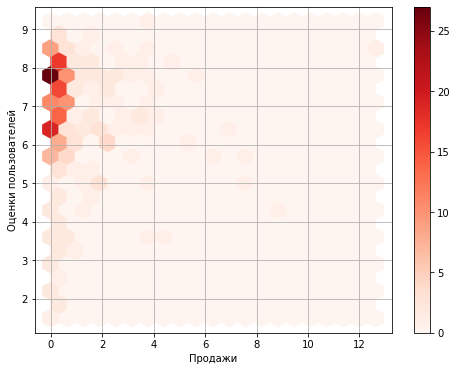

In [44]:
user_ps.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Reds)
plt.xlabel('Продажи')
plt.ylabel('Оценки пользователей')
plt.show()

Посчитаем корреляцию. 

In [45]:
user_ps['user_score'].corr(user_ps['total_sales'])

-0.03195711020455644

Коэффициент корреляции Пирсона отрицательный, но близкий к нулю. Это сложно, поскольку мы не можем точно сказать, либо рост продаж связан с уменьшением пользовательских оценок, либо, наоборот, хорошие оценки пользователей получают именно те игры, продажи которых не задались. Или же тесной линейной связи между этими значениями нет. 

Можно предположить, что субъективные оценки игроков основаны на множестве разных факторов. Например, крайне популярные игры за счет стратегий маркетингового продвижения сформировали повышенные ожидания, которые не были оправданы у пользователей. Или пользователи более склонны положительно оценивать эсклюзивные, на их взгляд, продукты, не дошедшие до массового потребителя. 

Кроме того, предыдущий анализ средних продаж позволяет нам сказать, что все-таки наибольшее число игр платформы не пользуется особой популярностью - их тираж исчисляется сотнями тысяч проданных копий - именно они и собирают основную базу как положительных, так и отрицательных оценок. Коммерчески успешные продукты подвержены большей критике, поэтому отзывы разнятся. 

Если проанализировать затемнения в середине графика, то можно сказать, что относительно популярные для платформы игры, продажи которых исчисляются миллионами копий собирают средние оценки в районе 5-6 баллов. Один из самых успешных продуктов с продажами в 12 млн. копий, как видно по небольшому пятну в правом верхнем углу все-таки удостоился чуть большего количества высоких оценок в 8,5, чем всех остальных. 

In [46]:
critic_ps = ps.query('critic_score != "tbd"')
critic_ps['critic_score'] = pd.to_numeric(critic_ps['critic_score'])
critic_ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             252 non-null    object 
 1   platform         252 non-null    object 
 2   year_of_release  252 non-null    int32  
 3   genre            252 non-null    object 
 4   na_sales         252 non-null    float64
 5   eu_sales         252 non-null    float64
 6   jp_sales         252 non-null    float64
 7   other_sales      252 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       252 non-null    object 
 10  rating           252 non-null    object 
 11  total_sales      252 non-null    float64
dtypes: float64(6), int32(1), object(5)
memory usage: 24.6+ KB


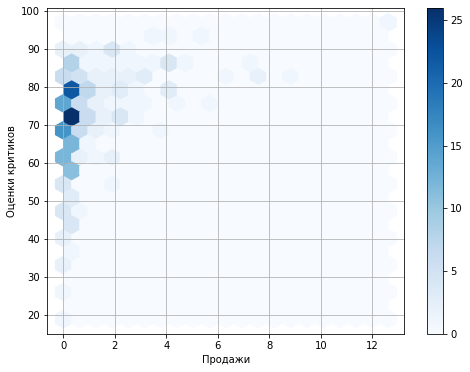

In [47]:
critic_ps.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Blues)
plt.xlabel('Продажи')
plt.ylabel('Оценки критиков')
plt.show()

In [48]:
critic_ps['critic_score'].corr(critic_ps['total_sales'])

0.40656790206178123

Коэффициент больше нуля. Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов критиков, чем пользователей. 

Теперь проанализируем ситуацию с другими платформами. 

In [49]:
others = games.query('platform != "PS4"')
others.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,tbd,tbd,NR,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,tbd,tbd,NR,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,tbd,tbd,NR,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,tbd,tbd,NR,7.39
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,tbd,tbd,NR,7.14


In [50]:
user_others = others.query('user_score != "tbd"')
user_others['user_score'] = pd.to_numeric(user_others['user_score'])

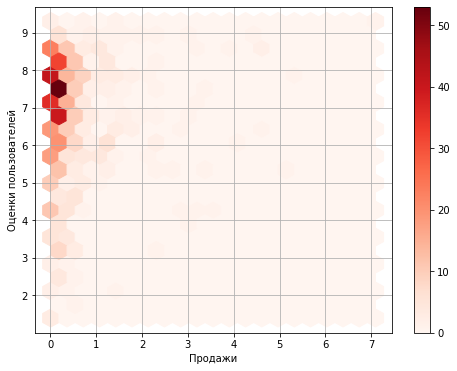

In [51]:
user_others.sort_values('total_sales').plot(x='total_sales', y='user_score', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Reds)
plt.xlabel('Продажи')
plt.ylabel('Оценки пользователей')
plt.show()

In [52]:
user_others['user_score'].corr(user_others['total_sales'])

0.051604792172730146

Корреляция не отрицательная, но приближенная к нулю. Тренд на высокие оценки менее продаваемых игр, как и в случае с данными по PS4 сохраняется. На поле более популярных игр меньше выраженных темных пятен, цвет более однородный, что связано, вероятно, с меньшим их количеством по сравнению с играми, продажи которых оцениваются сотнями тысяч копий. 

В целом, линейную зависимость между значениям проследить трудно.  

In [53]:
critic_others = others.query('critic_score != "tbd"')
critic_others['critic_score'] = pd.to_numeric(critic_others['critic_score'])

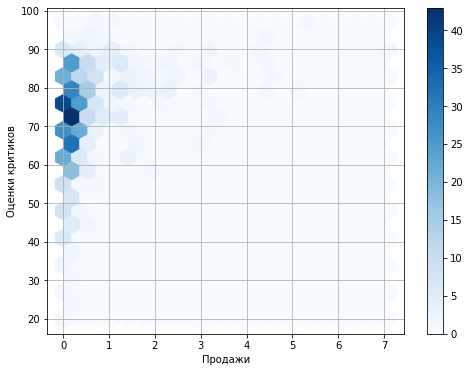

In [54]:
critic_others.sort_values('total_sales').plot(x='total_sales', y='critic_score', kind='hexbin', 
                                    gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap=plt.cm.Blues)
plt.xlabel('Продажи')
plt.ylabel('Оценки критиков')
plt.show()

In [55]:
critic_others['critic_score'].corr(critic_others['total_sales'])

0.306976784351779

Здесь коэффициент чуть ниже, скопление высоких оценок выражено ярче благодаря их количеству. Наблюдаются положительные оценки (80-90) критиков у продуктов, продажи которых находятся в районе 2-4 млн. копий. 

**Анализ наиболее продаваемых жанров**

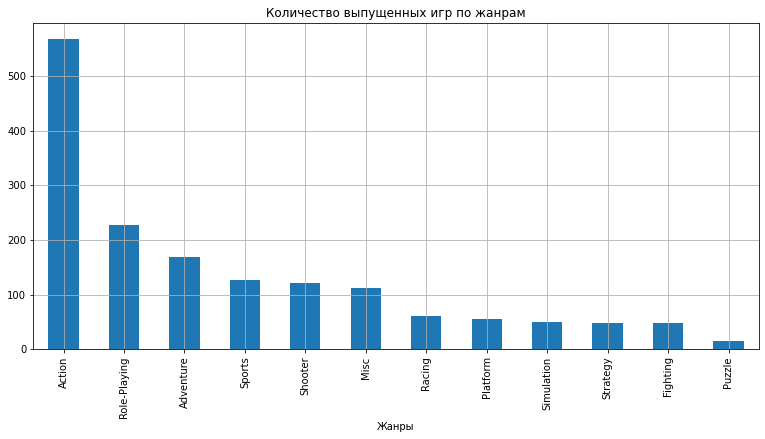

In [56]:
genres = games.groupby('genre')['name'].count()
genres.sort_values(ascending=False).plot(kind='bar', figsize=(13, 6), grid=True)
plt.title('Количество выпущенных игр по жанрам')
plt.xlabel('Жанры')
plt.show()

In [57]:
genres

genre
Action          568
Adventure       169
Fighting         48
Misc            112
Platform         55
Puzzle           16
Racing           60
Role-Playing    228
Shooter         122
Simulation       50
Sports          127
Strategy         49
Name: name, dtype: int64

Больше всего игр в датасете в жанре экшен - 568. Следующий по популярности у разработчиков жанр ролевой игры - 228 продуктов. Приключенческих историй 169. Примерно одинаковое количество игр за актуальный период было выпущено в жанрах спорт и шутеры. Оценим их популярность среди пользователей. 

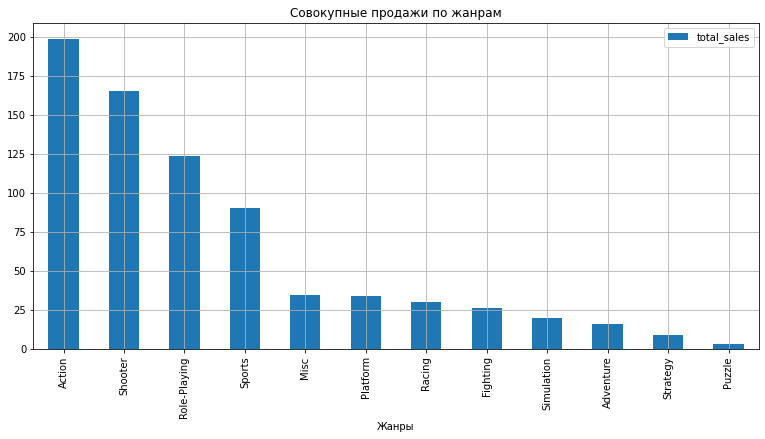

In [58]:
genres_table = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
genres_table.plot(kind='bar', figsize=(13, 6), grid=True)
plt.title('Совокупные продажи по жанрам')
plt.xlabel('Жанры')
plt.show()

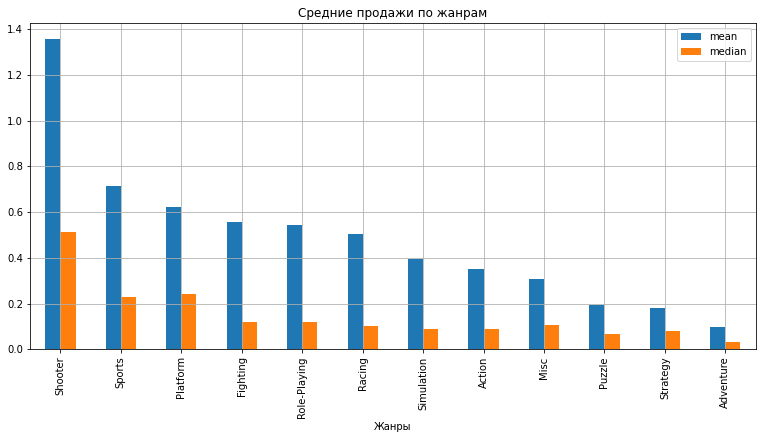

In [59]:
genres_table_mean = games.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median'))
genres_table_mean.sort_values(by='mean', ascending=False).plot(kind='bar', figsize=(13, 6), grid=True)
plt.title('Средние продажи по жанрам')
plt.xlabel('Жанры')
plt.show()

Экшен наиболее производимый и наиболее продаваемый жанр в целом - за выбранный период было продано почти 200 млн. копий. Однако в среднем одна игра в этом жанре продается тиражом в 0,35 млн. копий. То есть жанр является наиболее продаваемым за счет большего количества выпускаемых игр. 

На втором месте шутеры - продано почти 170 млн. копий, несмотря на то, что выпущено их было всего 122. То есть в среднем можно продать до 1,4 млн. экземпляров каждой игры. В жанре спорт совокупные продажи игр составялют 90 млн, тогда как выпущено их было столько же, сколько и шутеров. Средняя продаваемость спортивных игр 0,7 млн. копий. 

Игр в ролевом жанре было продано 125 млн, средние продажи за единицу примерно 0,55 млн. копий. Приключенческий жарн на третьем месте по количеству выпускаемых игр, но среди пользователей не популярен - всего около 20 млн. копий за текущий период и средние продажи его находятся в районе 0,1 млн. копий. Обратная ситуация с таким жанров игр как платформеры. Количество выпущенных игр находится в районе 50, тогда как в среднем каждая из них продается тиражом в 0,62 млн. копий, что больше, чем для игр в жанрах файтинг, рол плей, гонки, симуляции и экшен. 

Таким образом, экшен и рол плей входят в топ-5 жанров за счет количества производимого контента, шутеры, спортивные игры и платформеры за счет средних продаж за единицу продукта. 

## Пользовательский портрет в регионах 

Выделим пять самых популярных платформ - PS4, XOne, 3DS, WiiU (с расчетом на то, что следующее поколение консоли выйдет в новом году) и PC. 

In [60]:
prs = games.pivot_table(
    index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
prs # platforms regional sales

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
PC,25.36,0.00,11.11
PS4,141.09,15.96,108.74
PSV,6.10,18.59,5.04
WiiU,19.85,10.88,29.21
XOne,51.59,0.34,93.12


Для наглядности нарисуем тепловую карту, которая позволит нам визуально оценить популярность тех или иных платформ в разных регионах. 

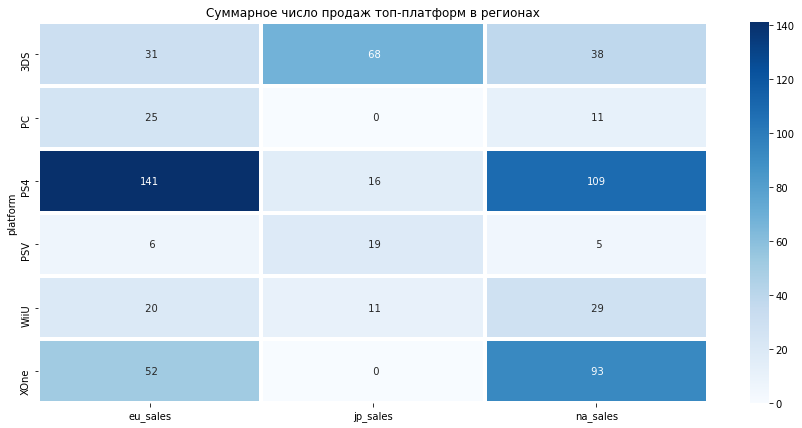

In [61]:
plt.figure(figsize=(15, 7))
sns.heatmap(prs, cmap=plt.cm.Blues, linewidths = 3, annot=True, fmt='3.0f')
plt.title('Суммарное число продаж топ-платформ в регионах')
plt.show()

Карта показывает, что и европейские (в большей степени), и американские потребители предпочитают продукты компании Play Station. Следующая по популярности платформа у западного игрока - XOne. В данном случае, сумма проданных копий в Соединенных Штатах больше. 

Японские пользователи буквально игнорируют XOne, уделяют меньшее внимание PS4. Самая популярная консоль в Японии - 3DS. За ней следует PSV, которая на западном рынке практически не нашла своего пользователя. 

PC и WiiU практически в равной степени неинтересны ни евпропейскому, ни американскому, ни японскому пользователю. 

Таки образом, выделим топ платформ по количеству проданных игр для каждого рынка. 

Европа: PS4, XOne, 3DS, PC, WiiU 

США: PS4, XOne, 3DS, WiiU, PC 

Япония: 3DS, PSV, PS4, WiiU (Продажи PC и XOne находятся на отметке в 0) 

Для оценки популярности жанров в регионах, выведем карту, по которой сможем отследить топ-5 наиболее продаваемых в регионах. 

In [62]:
grs = games.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
grs #genres regional sales

,eu_sales,jp_sales,na_sales
genre,,,
Action,73.96,29.87,73.43
Adventure,5.88,4.37,4.57
Fighting,6.58,5.33,12.10
Misc,10.61,8.27,12.69
Platform,12.16,4.75,14.18
Puzzle,1.00,1.14,0.83
Racing,15.18,1.68,10.29
Role-Playing,32.00,44.84,37.92
Shooter,64.89,4.56,75.37


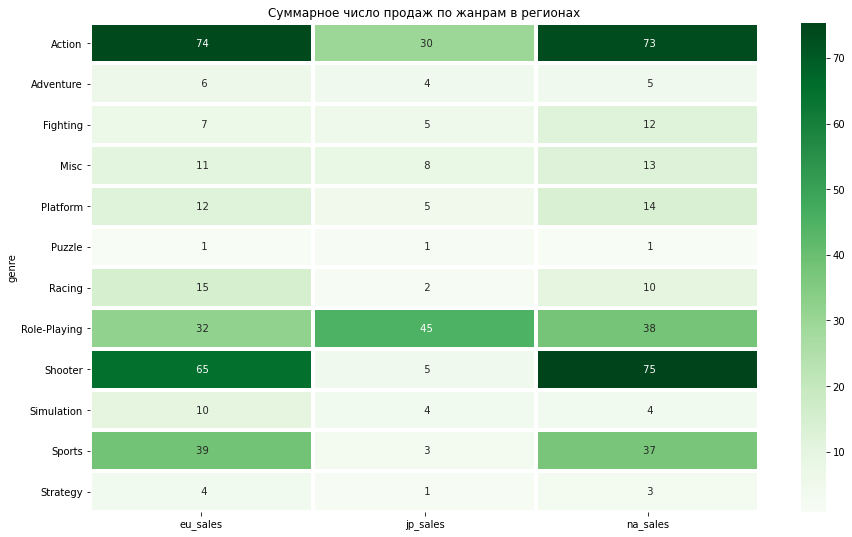

In [63]:
plt.figure(figsize=(15, 9))
sns.heatmap(grs, cmap=plt.cm.Greens, linewidths = 3, annot=True, fmt='3.0f')
plt.title('Суммарное число продаж по жанрам в регионах')
plt.show()

Американский потребитель предпочитает игры в жанре экшен и шутеры. Ролевые и спортивные в два раза менее продаваемые в регионе. Пятое место по популярности занимают платформеры. 

Почти такая же картина и в Европе, однако шутеры чуть менее привлекательны: основный жанр - экшен, последнее место в топ-5 занимают гонки. Еще интересно, что европейский потребитель больше, чем все остальные любит симуляции. 

В Японии гонки и спортивные игры совсем не покупают. Наибольшее внимание уделяется ролевым играм и в меньшей степени экшен играм. За ними следуют (всего с 5 млн. проданных копий) шутеры, файтинги и платформеры. 

Топ-5 выглядит следующим образом. 

Европа: Action, Shooter, Sports, Role-Playing, Racing 

США: Shooter, Action, Role-Playing, Sports, Platform 

Япония: Role-Playing, Action, Fighting, Platform, Shooter (8 млн. копий было продано в других жанрах под сокращенным названием Misc (разное)).  

In [64]:
rate = games.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales',]].sum()
rate

,eu_sales,jp_sales,na_sales
rating,,,
E,58.00,13.26,52.37
E10+,26.30,5.66,32.25
M,94.51,8.17,97.05
NR,63.54,72.97,68.68
T,32.60,13.52,35.07


NR мы определили выше как Not rated. 

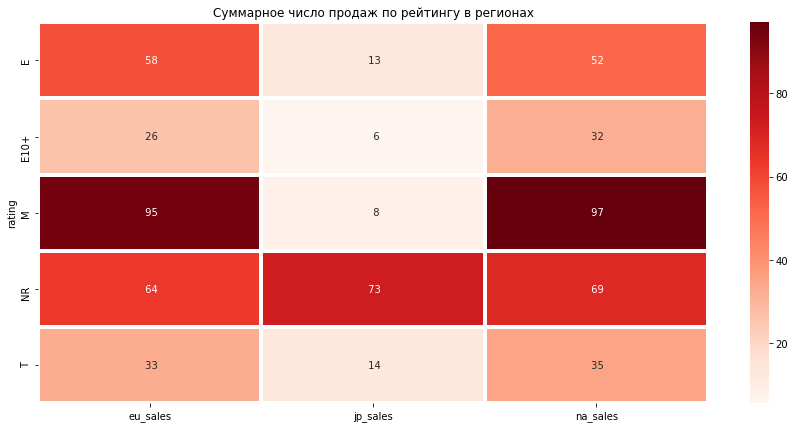

In [65]:
plt.figure(figsize=(15, 7))
sns.heatmap(rate, cmap=plt.cm.Reds, linewidths = 3, annot=True, fmt='3.0f')
plt.title('Суммарное число продаж по рейтингу в регионах')
plt.show()

В Европе и Америке наиболее популярны игры исключительно для взрослой аудитории (вероятно, это подтверждает любовь жителей этих регионов к шутерам и экшену). Следуют за ним игры с рейтингом "для всех", затем специфические игры для подростковой аудитории и аудитории 10+. В целом, цифры по западным регионам почти совпадают. 

Ситуация с Японией интереснее. Из карты понятно, что большинство игр в датасете, проданных в Японии не имели отметки о возрастном рейтинге. Можно предположить, что это связано с собственной японской системой классификации. В остальном больше игр для подростков и "для всех".

Таким образом, можно составить своеобразный портрет пользователя в каждом регионе. 

Европеец с большей вероятностью будет играть в PS4 или на крайний случай в XOne в жанре экшtн или шутер с рейтингом "для взрослых". Меньше выберут ролевую игру или игру в жанре спорт с рейтингом "для всех".

Американец поступит также, но подумает между PS4 и XOne и чаще, чем европеец выберет вторую консоль. 

Японский потребитель - фанат собственной продукции и выберет игры от платформы 3DS в жанре экшен и рол плей. И скорей всего на ней не будет отметки компании ESRB. 

## Проверка гипотез 

Сформулируем нулевую гипотезу: *средние пользовательские рейтинги платформ Xbox One и PC равны*. Если данные гипотезе не противоречат, то мы ее не отвергаем. Но если нулевую гипотезу мы отвергаем, то в качестве альтернативной выступает следующая: *средние пользовательские рейтинги платформ Xbox One и PC отличаются*. 

In [66]:
xb = user_others.query('platform == "XOne"')
pc = user_others.query('platform == "PC"')

Посчитаем дисперсии этих значений. 

In [67]:
np.var(xb['user_score'])

1.8965188383045533

In [68]:
np.var(pc['user_score'])

3.0163063475546332

Проведем тест Уэлча, критический уровень статистической значимости 0.05. 

In [69]:
pc_list = np.asarray(pc['user_score'])
xb_list = np.asarray(xb['user_score'])

In [70]:
alpha = 0.05 

results = st.ttest_ind(pc_list, xb_list, equal_var=False) 
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу. Значит игры на PC и XBox получают примерно равные средние пользовательские оценки. Посмотрим на распределение. 

In [71]:
pc_means = []
xb_means = []

for _ in range(1000):
    pc_random = np.random.choice(pc_list, size=len(pc_list), replace=True)
    xb_random = np.random.choice(xb_list, size=len(xb_list), replace=True)
    pc_means.append(np.mean(pc_random))
    xb_means.append(np.mean(xb_random))

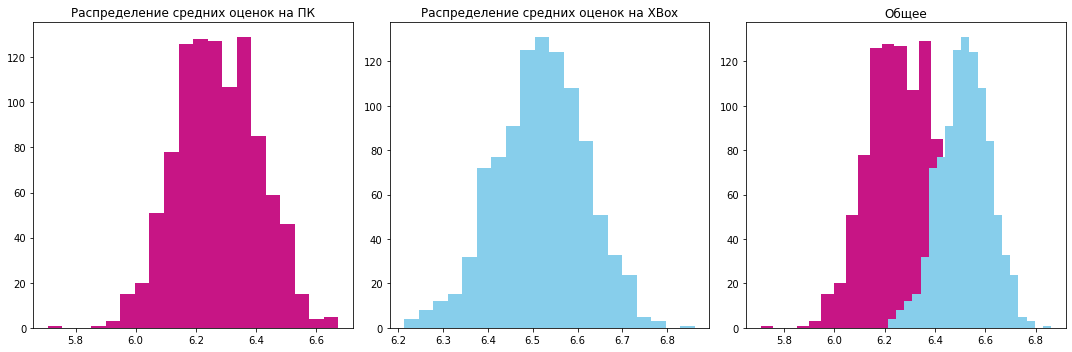

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Распределение средних оценок на ПК')
ax[0].hist(pc_means, bins=20, color='mediumvioletred')

ax[1].set_title('Распределение средних оценок на XBox')
ax[1].hist(xb_means, bins=20, color='skyblue')

ax[2].set_title('Общее')
ax[2].hist(pc_means, bins=20, color='mediumvioletred')
ax[2].hist(xb_means, bins=20, color='skyblue')

fig.tight_layout()

Распределения соответствуют нормальному и находятся вокруг среднего в 6,3 для PC и 6,5 для XOne. 

Еще одну нулевую гипотезу сформулируем следующим образом: *средние пользовательские оценки жанров Action и Sports равны*. Альтернативная предполагает, что они отличаются. 

In [73]:
action = games.query('genre == "Action" and user_score != "tbd"')
action['user_score'] = pd.to_numeric(action['user_score'])

sports = games.query('genre == "Sports" and user_score != "tbd"')
sports['user_score'] = pd.to_numeric(sports['user_score'])

In [74]:
np.var(action['user_score'])

1.7416009849184375

In [75]:
np.var(sports['user_score'])

2.645630820507794

In [76]:
action_list = np.asarray(action['user_score'])
sports_list = np.asarray(sports['user_score'])

In [77]:
alpha = 0.05 

results = st.ttest_ind(action_list, sports_list, equal_var=False) 
print('p-значение:', results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2678091455806196e-11
Отвергаем нулевую гипотезу


Нулевая гипотеза не принята, значит, пользовательские оценки игр в жанрах экшен и спорт не одинаковые. 

In [78]:
action_means = []
sports_means = []

for _ in range(1000):
    action_random = np.random.choice(action_list, size=len(action_list), replace=True)
    sports_random = np.random.choice(sports_list, size=len(sports_list), replace=True)
    action_means.append(np.mean(action_random))
    sports_means.append(np.mean(sports_random))

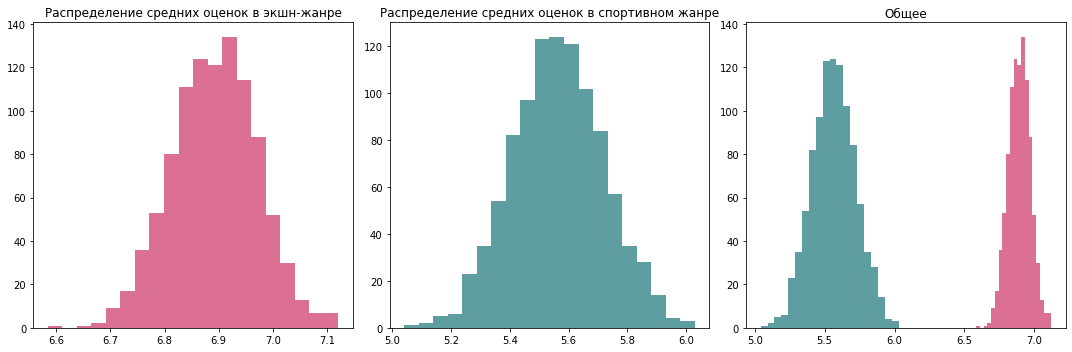

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].set_title('Распределение средних оценок в экшн-жанре')
ax[0].hist(action_means, bins=20, color='palevioletred')

ax[1].set_title('Распределение средних оценок в спортивном жанре')
ax[1].hist(sports_means, bins=20, color='cadetblue')

ax[2].set_title('Общее')
ax[2].hist(action_means, bins=20, color='palevioletred')
ax[2].hist(sports_means, bins=20, color='cadetblue')

fig.tight_layout()

Средние распределены вокруг разных значений: пользовательская оценка игр в жанре экшен выше - в среднем 6,9 баллов. Для спортивных игр это значение находится в районе 5,6. Распределения не пересекаются, значит, мы отвергаем нулевую гипотезу и делаем вывод, что пользователи выше оценивают те игры, где упор делается на эксплуатацию физических возможностей игрока. 

## Общий вывод

Игровая индустрия на текущий момент переживает не лучшие времена. Пик продаж наблюдался в 2008 году, к 2016 году продажи игр всех платформ *упали.* 

**Лидеры продаж**

Среди лидеров можно выделить три компании, предоставляющие большинство популярных компьютерных игр: *Play Station, Microsoft и его семейство игровых консолей XBox и Nintendo.* Выпуск каждой новой консоли подразумевает ее конечное существование. Платформа проходит своеобразный жизненный цикл: рост популярности, пик, спад. Для более ранних платформ характерен более короткий срок выпуска продукта. У платформ, выпущенных после 2000 года более долгий период существования - в среднем 7,5 лет, учитывая те, что на момент составления датасета еще выпускали игры. Исключив их, средняя "жизнь" увеличится до *10 лет.* Компания Play Station меняет платформу раз в 10 лет. Игровые консоли Xbox тоже живут довольно долго. Первая существовала 8 лет. Вторая - 11.

Точкой отсчета актуального периода считаем 2013 год, когда на рынок вышли игровые приставки восьмого поколения - PS4 и XOne, только начинающие свой цикл. Несмотря на продажи игр после 2013 года, поддержка некоторых из этих консолей за актуальный период была прекращена. DS выпустила свою последнюю игру в 2013 году. PSP также прекратила выпуск в 2015. К 2016 году почти в ноль ушли PS3, на смену которой пришла PS4, X360, которую сменила XOne и Wii, новой версией которой стала Wii U. 

Таким образом, мы можем выделить ряд действительных на 2016 год игровых приставок: PS4 от PlayStation, XOne от XBox, WiiU от Nintendo. Также портативные консоли 3DS от Nintendo и PSV от Play Station. Кроме того, продолжается выпуск игр для компьютеров(PC).

Лидерами продаж являются *PS4, XOne и 3DS*. В будущем стоит обратить внимание на платформу восьмого поколения *Nintendo Switch*, которая в 2017 году заменит консоль WiiU.  

**Успешность продаж количественно**

Медианное значение продаж игр платформ PS4, WiiU и XOne - 0,2, 0,2 и 0,23 млн. копий соответственно. Несмотря на то, что медиана продаж PS4 чуть меньше, чем XOne, ее среднее значительно больше - 0,8 млн. копий (у XOne в районе 0,68 млн.). 

*У PS4 есть ряд игр, ставших бестселлерами игровой индустрии за текущий период. У XOne они тоже есть, но не в таком количестве*. 

Среднее значение продаж игр на платформе 3DS - 0,48 млн. копий, тогда как медиана в районе 0,16. Разница между ними составляет почти 0,3 млн. копий. Примерно такая же разница между медианой (0,2) и средним (0,55) у продаж платформы WiiU, однако крайняя точка усов высоко (почти 1,3 млн. копий). 

*У портативной консоли 3DS больше единичных игр, уже завоевавших признание пользователей в прошлом, но превалирующее большинство выпущенных игр совсем не популярно, в то время как WiiU стандартно выпускает игры с преимущественно одинаковым успехом у пользователей*. 

Рост популярности домашних и портативных консолей повлиял на пользовательский интерес к играм на ПК. За актуальный период медианные продажи составили примерно 0,15 млн. копий. Среднее в районе 0,2. Тем не менее наблюдаются и более успешные единичные релизы.

Наименьшей популярностью пользуется PSV. Видимо, качество контента платформы или самой консоли оказалось заметно ниже ее конкурента от Nintendo и, по сравнению с 3DS на ней нет настолько выдающихся бестселлеров.

Сравнивая конкурентов PS4 и XOne, можно отметить, что на первой платформе выходили игры, завоевашие наибольшую популярность у пользователей. Выбросов много и числовые значения их доходят вплоть до 14,5 млн. копий, тогда как пиковое значение XOne - 7,5 млн.
Такая же история с 3DS и PSV. У первой есть игры - бесспорные лидеры игровой индустрии - 11,7 и 14,5 млн. копий - и в целом количество выбросов намного больше нежели у PSV. Ее максимум за актуальный период - 2 млн. копий.

*Особо популярные игры на платформе WiiU были, но относительно других платформ их немного. Зато медиана на высоком уровне, сравнимом с конкурентами ее следующей версии - Nintendo Switch*.

**Зависимость продаж от пользовательских оценок**

Относительно зависимости продаж игр платформы PS4 от оценок пользователей мы не можем точно сказать, либо рост продаж связан с уменьшением пользовательских оценок, либо, наоборот, хорошие оценки пользователей получают именно те игры, продажи которых не задались. Или же тесной линейной связи между этими значениями нет.
Можно предположить, что субъективные оценки игроков основаны на множестве разных факторов. Например, крайне популярные игры за счет стратегий маркетингового продвижения сформировали повышенные ожидания, которые не были оправданы у пользователей. Или пользователи более склонны положительно оценивать эсклюзивные, на их взгляд, продукты, недошедшие до массового потребителя.
Кроме того, все-таки наибольшее число игр платформы не пользуется особой популярностью - их тираж исчисляется сотнями тысяч проданных копий - именно они и собирают основную базу как положительных, так и отрицательных оценок. Коммерчески успешные продукты подвержены большей критике, поэтому отзывы разнятся.

В отношении других платформ, тренд на высокие оценки менее продаваемых игр, как и в случае с данными по PS4 сохраняется. 

**Зависимость продаж от оценок критиков** 

Зависимость между значениями не высокая, но она есть. Популярные продукты платформы собирают больше положительных отзывов критиков, чем пользователей.

**Пользовательский портрет в Европе, США и Японии**

*Платформы*

И европейские (в большей степени), и американские потребители предпочитают продукты компании Play Station. Следующая по популярности платформа у западного игрока - XOne. В США она более популярна, чем в Европе. 

Японские пользователи буквально игнорируют XOne, уделяют меньшее внимание PS4. Самая популярная консоль в Японии - 3DS. За ней следует PSV, которая на западном рынке практически не нашла своего пользователя.

PC и WiiU практически в равной степени неинтересны ни евпропейскому, ни американскому, ни японскому пользователю.

*Жанры*

Американский потребитель предпочитает игры в жанре экшен и шутеры. Ролевые и спортивные в два раза менее продаваемые в регионе. Пятое место по популярности занимают платформеры.  

Почти такая же картина и в Европе, однако шутеры чуть менее привлекательны: основный жанр - экшен, последнее место в топ-5 занимают гонки. Еще интересно, что европейский потребитель больше, чем все остальные любит симуляции.

В Японии гонки и спортивные игры совсем не покупают. Наибольшее внимание уделяется ролевым играм и в меньшей степени экшен играм. За ними следуют (всего с 5 млн. проданных копий) шутеры, файтинги и платформеры.

*Рейтинг*

В Европе и Америке наиболее популярны игры исключительно для взрослой аудитории. Следуют за ним игры с рейтингом "для всех", затем специфические игры для подростковой аудитории и аудитории 10+. В целом, цифры по западным регионам почти совпадают.
Ситуация с Японией интереснее. Большинство игр в датасете, проданных в Японии не имели отметки о возрастном рейтинге. Это связано с собственной японской системой классификации. В остальном больше игр для подростков и "для всех".

Таким образом, можно составить топ предпочтений пользователей в каждом регионе. 

*Европа:*

Платформы: PS4, XOne, 3DS, PC, WiiU
Жанры: Action, Shooter, Sports, Role-Playing, Racing
Рейтинг: M, E, 23% проданных игр не имеет отметки компании ESRB

*США:*

Платформы: PS4, XOne, 3DS, WiiU, PC
Жанры: Shooter, Action, Role-Playing, Sports, Platform
Рейтинг: M, E, 24% проданных игр не имеет отметки компании ESRB

*Япония:* 

Платформы: 3DS, PSV, PS4, WiiU 
Жанры: Role-Playing, Action, Fighting, Platform, Shooter 
Рейтинг: 64% проданных игр не имеет отметки компании ESRB в связи с использованием собственной классификации CERO